In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
n_dim = 784
n_class = 10

X = tf.placeholder(tf.float32, shape=[None,n_dim])
Y = tf.placeholder(tf.float32, shape=[None,n_class])

W = tf.Variable(tf.random_normal([n_dim,n_class]), name='weight')
b = tf.Variable(tf.random_normal([n_class]), name='bias')

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

Epoch: 0001 cost = 9.032308239
Epoch: 0002 cost = 4.352731054
Epoch: 0003 cost = 2.953739142
Epoch: 0004 cost = 2.351704034
Epoch: 0005 cost = 2.007954416
Epoch: 0006 cost = 1.782533820
Epoch: 0007 cost = 1.621864811
Epoch: 0008 cost = 1.501372205
Epoch: 0009 cost = 1.406988271
Epoch: 0010 cost = 1.330674259
Epoch: 0011 cost = 1.267065146
Epoch: 0012 cost = 1.213347735
Epoch: 0013 cost = 1.167077648
Epoch: 0014 cost = 1.126770950
Epoch: 0015 cost = 1.091097029
Accuracy:  0.8002
Label:  [8]
Prediction:  [8]


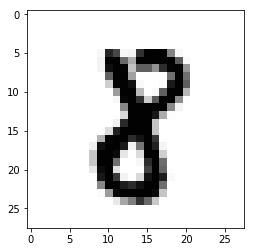

In [6]:
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c,_ = sess.run([cost, optimizer], feed_dict={X:batch_xs, Y:batch_ys})
            avg_cost += c / total_batch
        
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
        
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest')
    plt.show()
        